In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
import datetime as dt

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
measurement

sqlalchemy.ext.automap.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# variable that shows all of the dates in the measurement class
date = session.query(measurement.date)
for row in date:
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2017-04-11',)
('2017-04-12',)
('2017-04-13',)
('2017-04-14',)
('2017-04-17',)
('2017-04-18',)
('2017-04-19',)
('2017-04-20',)
('2017-04-21',)
('2017-04-22',)
('2017-04-24',)
('2017-04-25',)
('2017-04-26',)
('2017-04-27',)
('2017-04-28',)
('2017-04-29',)
('2017-04-30',)
('2017-05-01',)
('2017-05-02',)
('2017-05-03',)
('2017-05-04',)
('2017-05-05',)
('2017-05-06',)
('2017-05-08',)
('2017-05-09',)
('2017-05-10',)
('2017-05-12',)
('2017-05-15',)
('2017-05-16',)
('2017-05-17',)
('2017-05-18',)
('2017-05-19',)
('2017-05-20',)
('2017-05-22',)
('2017-05-23',)
('2017-05-24',)
('2017-05-25',)
('2017-05-26',)
('2017-05-27',)
('2017-05-28',)
('2017-05-29',)
('2017-05-30',)
('2017-05-31',)
('2017-06-01',)
('2017-06-02',)
('2017-06-03',)
('2017-06-04',)
('2017-06-05',)
('2017-06-06',)
('2017-06-07',)
('2017-06-08',)
('2017-06-09',)
('2017-06-10',)
('2017-06-11',)
('2017-06-12',)
('2017-06-13',)
('2017-06-14',)
('2017-06-15',)
('2017-06-16',)
('2017-06-17',)
('2017-06-18',)
('2017-06-19',)
('2017-0

('2012-06-26',)
('2012-06-29',)
('2012-07-02',)
('2012-07-20',)
('2012-07-22',)
('2012-07-23',)
('2012-07-24',)
('2012-07-25',)
('2012-07-30',)
('2012-07-31',)
('2012-08-01',)
('2012-08-03',)
('2012-08-06',)
('2012-08-24',)
('2012-09-14',)
('2012-09-17',)
('2012-09-21',)
('2012-09-24',)
('2012-10-05',)
('2012-10-08',)
('2012-10-10',)
('2012-10-11',)
('2012-10-12',)
('2012-10-15',)
('2012-10-16',)
('2012-10-17',)
('2012-10-18',)
('2012-10-22',)
('2012-11-01',)
('2012-11-08',)
('2012-11-13',)
('2012-11-15',)
('2012-11-16',)
('2012-11-20',)
('2012-11-26',)
('2012-11-27',)
('2012-12-03',)
('2012-12-06',)
('2013-01-10',)
('2013-01-14',)
('2013-01-23',)
('2013-01-24',)
('2013-01-25',)
('2013-02-01',)
('2013-02-02',)
('2013-02-06',)
('2013-02-07',)
('2013-02-08',)
('2013-02-14',)
('2013-02-15',)
('2013-02-20',)
('2013-02-22',)
('2013-02-25',)
('2013-02-27',)
('2013-04-03',)
('2013-04-05',)
('2013-04-08',)
('2013-04-11',)
('2013-04-15',)
('2013-08-05',)
('2013-08-06',)
('2013-08-07',)
('2013-0

In [13]:
#displaying the first row of data in the measurement class
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19c17b0d780>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08}

In [14]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [15]:
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [16]:
#first creating a separate variable to create a list of just the date and precipitation values from the measurement class
sel = [measurement.date, measurement.prcp]

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database

# Perform a query to retrieve the data and precipitation scores
past_twelve_months = session.query(*sel).filter(measurement.date >= year_ago).all()
past_twelve_months

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
#session.query(measurement.date).filter(measurement.date >= '2016-08-23').all()

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(past_twelve_months)
prcp_df = prcp_df.rename(columns={'date': 'Date', 'prcp':'Precipitation'})

prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [19]:
# Sort the dataframe by date and clean the "NaN values from the Precipitation column"

prcp_sorted = prcp_df.sort_values(by='Date',ascending=True)
prcp_clean = prcp_sorted.dropna()
prcp_clean

,Date,Precipitation
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [20]:
# Minimum precipitation value
prcp_clean['Precipitation'].min()

0.0

In [21]:
# Maximum precipitation value
prcp_clean['Precipitation'].max()

6.7

In [22]:
#Total count
prcp_clean['Precipitation'].count()

2021

In [23]:
import matplotlib.dates as mdates

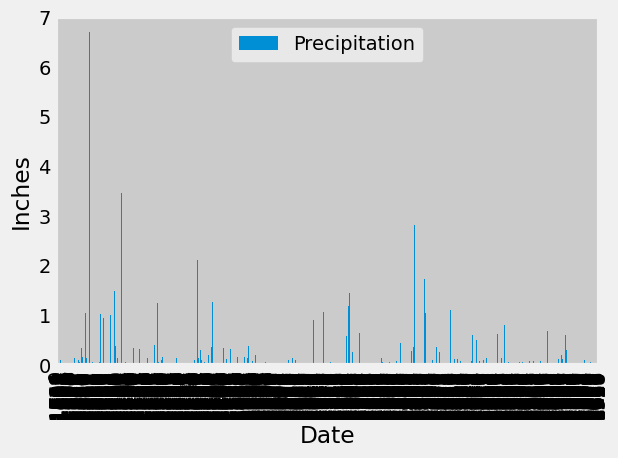

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
#x_axis = prcp_sorted['Date']
#y_axis = prcp_sorted['Precipitation']
prcp_clean.plot.bar()
                               
plt.xlabel('Date')
plt.ylabel('Inches')

plt.ylim(0, 7)
plt.xticks(rotation=90)

#plt.axis.set_major_locator(mdates.MonthLocator(interval=5))
#plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-$d'))
#plt.autofmt_xdate()

plt.tight_layout()



plt.show()


In [25]:
#Total count
total_count = (prcp_clean['Precipitation'].count()).astype('float')
total_count

2021.0

In [26]:
# Average precipitation
mean = round(prcp_clean['Precipitation'].mean(),6)
mean

0.177279

In [27]:
std_dev = round(np.std(prcp_clean['Precipitation'], ddof=0),6)
std_dev

0.461075

In [28]:
minimum = round(prcp_clean['Precipitation'].min(),6)
minimum

0.0

In [29]:
quartiles = prcp_clean['Precipitation'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
median = quartiles[0.5]
print(lowerq)
print(upperq)
print(median)

0.0
0.13
0.02


In [30]:
# Maximum precipitation value
maximum = prcp_clean['Precipitation'].max()
maximum

6.7

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data

summary_statistics_df = pd.DataFrame({'precipitation':[total_count, mean, std_dev, minimum, lowerq, median, upperq,maximum]})
summary_statistics_df = summary_statistics_df.rename(index={0:'count',
                                                           1:'mean',
                                                           2:'std',
                                                           3:'min',
                                                           4: '25%',
                                                           5: '50%',
                                                           6: '75%',
                                                           7: 'max'})

summary_statistics_df


,precipitation
count,2021.000000
mean,0.177279
std,0.461075
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [32]:
pd.DataFrame(prcp_clean['Precipitation'].describe())

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [35]:
check = session.query(station.id, station.name, station.station).all()
for row in check:
    print(row)

(1, 'WAIKIKI 717.2, HI US', 'USC00519397')
(2, 'KANEOHE 838.1, HI US', 'USC00513117')
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
(4, 'PEARL CITY, HI US', 'USC00517948')
(5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838')
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
(7, 'WAIHEE 837.5, HI US', 'USC00519281')
(8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
(9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(station.name, station.station).order_by(station.station.desc()).all()

[('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

session.query(*sel).filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [measurement.date, measurement.tobs]

most_active_station = session.query(*sel).filter(measurement.date >= year_ago).filter(measurement.station == 'USC00519281').all()
most_active_station



[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [39]:
#Converting the previous query into a dataframe
active_station_df = pd.DataFrame(most_active_station)
active_station_df

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [40]:
station_array = active_station_df['tobs'].to_numpy()
station_array

array([77., 77., 80., 80., 75., 73., 78., 77., 78., 80., 80., 78., 78.,
       78., 73., 74., 80., 79., 77., 80., 76., 79., 75., 79., 78., 79.,
       78., 78., 76., 74., 77., 78., 79., 79., 77., 80., 78., 78., 78.,
       77., 79., 79., 79., 79., 75., 76., 73., 72., 71., 77., 79., 78.,
       79., 77., 79., 77., 78., 78., 78., 78., 77., 74., 75., 76., 73.,
       76., 74., 77., 76., 76., 74., 75., 75., 75., 75., 71., 63., 70.,
       68., 67., 77., 74., 77., 76., 76., 75., 76., 75., 73., 75., 73.,
       75., 74., 75., 74., 75., 73., 75., 73., 73., 74., 70., 72., 70.,
       67., 67., 69., 70., 68., 69., 69., 66., 65., 68., 62., 75., 70.,
       69., 76., 76., 74., 73., 71., 74., 74., 72., 71., 72., 74., 69.,
       67., 72., 70., 64., 63., 63., 62., 70., 70., 62., 62., 63., 65.,
       69., 77., 70., 74., 69., 72., 71., 69., 71., 71., 72., 72., 69.,
       70., 66., 65., 69., 68., 68., 68., 59., 60., 70., 73., 75., 64.,
       59., 59., 62., 68., 70., 73., 79., 75., 65., 70., 74., 70

Text(0, 0.5, 'Frequency')

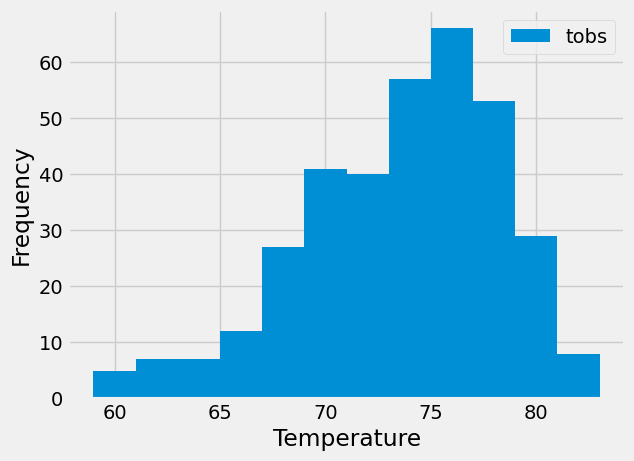

In [41]:
#Plot the results as a histogram 


active_station_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [42]:
# Close Session
session.close()